In [1]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sklearn
from sklearn import tree
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("G:\\DS150423\\MACHINE LEARNING\\house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
df = pd.read_csv("G:\\DS150423\\MACHINE LEARNING\\house_rental_data.csv.txt", index_col = 'Unnamed: 0')
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [5]:
df.shape

(645, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [7]:
df.describe(include = 'all')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
df.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [10]:
df["Price"].describe(include = 'all')

count       645.000000
mean      61986.823256
std       35635.091007
min        6100.000000
25%       39000.000000
50%       50000.000000
75%       75000.000000
max      250000.000000
Name: Price, dtype: float64

In [11]:
''' Price values higher than its mean  '''

avg_Price = df.loc[df["Price"] >= 61986.823256]
avg_Price 

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
6,1127.886,11,12,4,2,2,148000
10,1423.200,4,5,4,2,2,65000
16,2768.124,6,19,3,2,2,100000
...,...,...,...,...,...,...,...
637,2042.292,6,18,2,2,2,82000
639,1889.298,18,21,3,2,2,70000
642,1707.840,9,15,3,2,2,80000
643,2846.400,5,12,4,2,2,138888


#### Visualizing Parameters

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

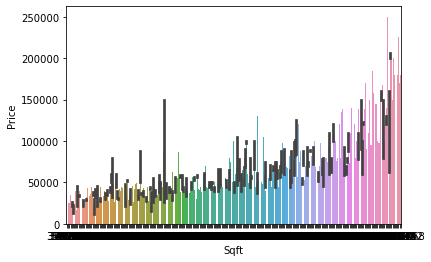

In [12]:
sns.barplot(x = df['Sqft'], y = df["Price"])

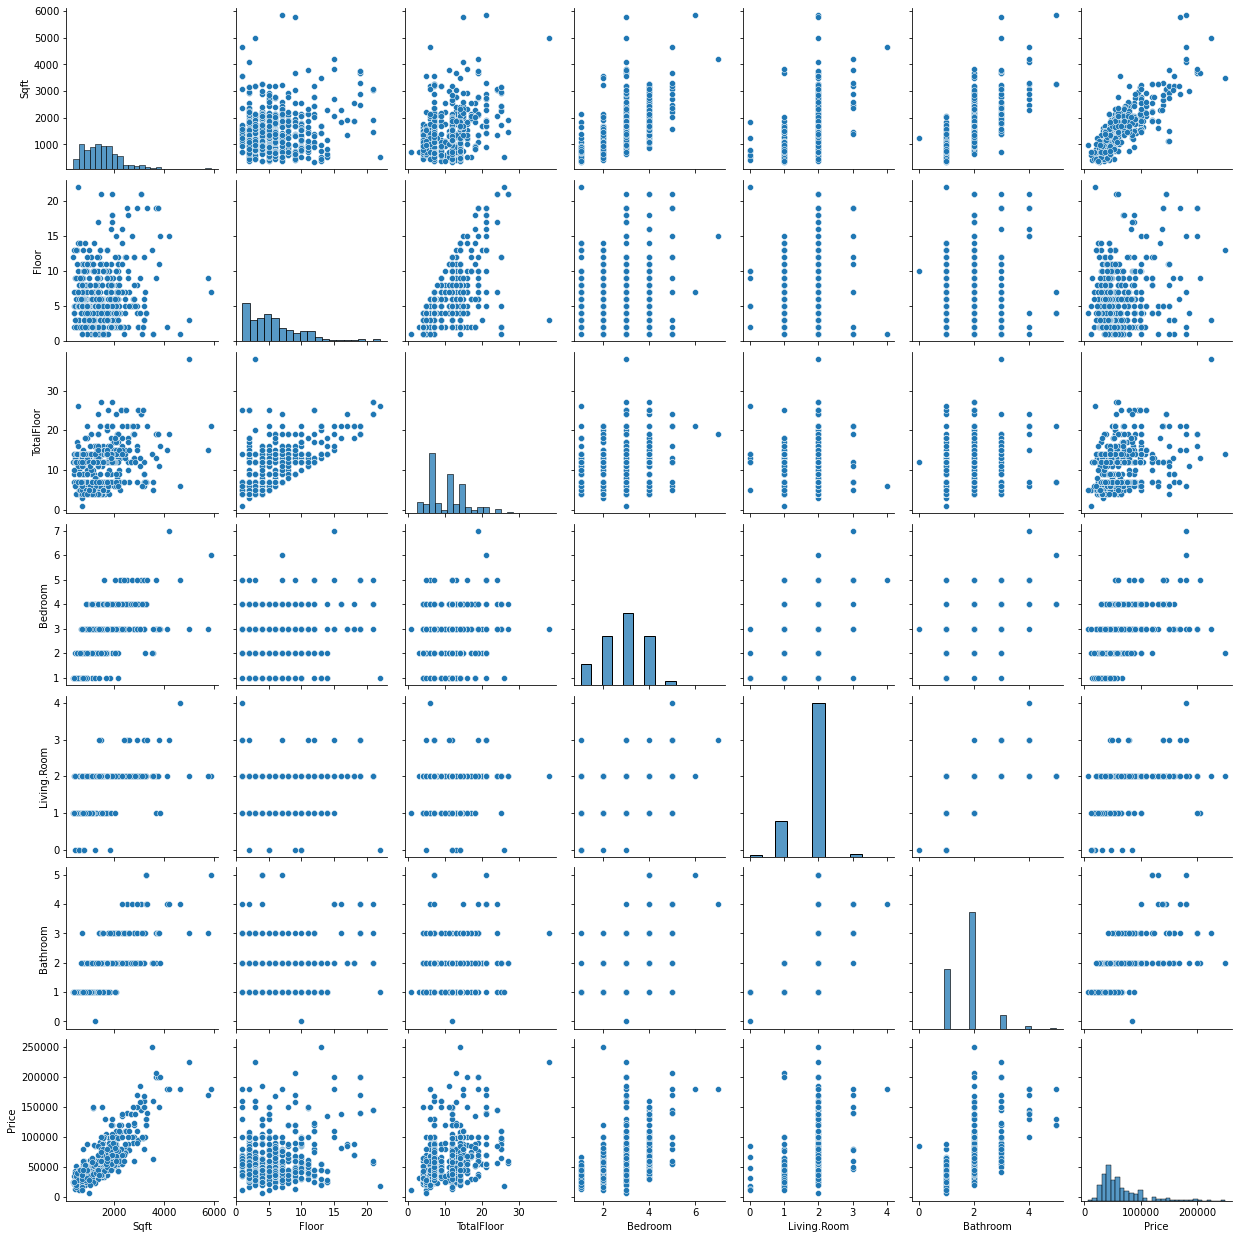

In [13]:
sns.pairplot(df)

In [14]:
df.drop_duplicates(inplace = True)
drp = df.duplicated()
drp.sum()

0

<AxesSubplot:>

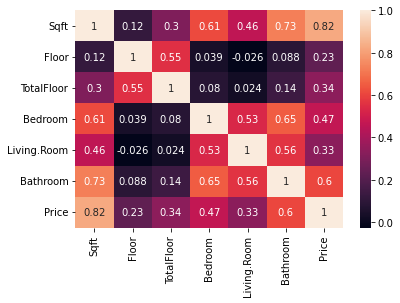

In [15]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True)

<AxesSubplot:ylabel='Frequency'>

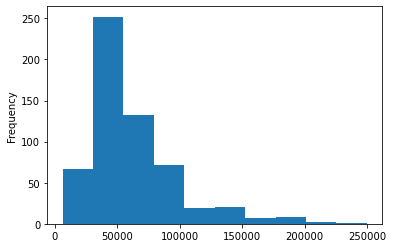

In [18]:
df["Price"].plot(kind = 'hist')

<AxesSubplot:xlabel='Price', ylabel='Sqft'>

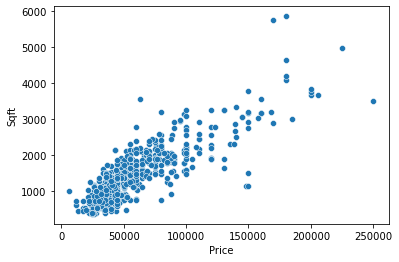

In [23]:
sns.scatterplot(x = df['Price'], y = df['Sqft'])

#### Detecting Outliers and Handling them

<AxesSubplot:>

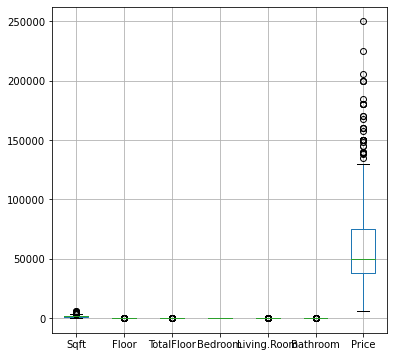

In [25]:
df.boxplot(figsize = (6,6))

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [28]:
lower_range, upper_range = remove_outlier(df['Price'])
df['Price'] = np.where(df['Price']>upper_range,upper_range,
                           df['Price'])
df['Price'] = np.where(df['Price']<lower_range,lower_range,
                           df['Price'])

lower_range, upper_range = remove_outlier(df['Sqft'])
df['Sqft'] = np.where(df['Sqft']>upper_range,upper_range,
                           df['Sqft'])
df['Sqft'] = np.where(df['Sqft']<lower_range,lower_range,
                           df['Sqft'])

lower_range, upper_range = remove_outlier(df['Floor'])
df['Floor'] = np.where(df['Floor']>upper_range,upper_range,
                           df['Floor'])
df['Floor'] = np.where(df['Floor']<lower_range,lower_range,
                           df['Floor'])

lower_range, upper_range = remove_outlier(df['TotalFloor'])
df['TotalFloor'] = np.where(df['TotalFloor']>upper_range,upper_range,
                           df['TotalFloor'])
df['TotalFloor'] = np.where(df['TotalFloor']<lower_range,lower_range,
                           df['TotalFloor'])

lower_range, upper_range = remove_outlier(df['Living.Room'])
df['Living.Room'] = np.where(df['Living.Room']>upper_range,upper_range,
                           df['Living.Room'])
df['Living.Room'] = np.where(df['Living.Room']<lower_range,lower_range,
                           df['Living.Room'])

lower_range, upper_range = remove_outlier(df['Bathroom'])
df['Bathroom'] = np.where(df['Bathroom']>upper_range,upper_range,
                           df['Bathroom'])
df['Bathroom'] = np.where(df['Bathroom']<lower_range,lower_range,
                           df['Bathroom'])

#### Data Splitting and Scaling; Model Training 

In [29]:
X = df.drop(["Price"], axis = 1)
Y = df["Price"]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 1. LINEAR REGRESSION MODEL

In [41]:
model = LinearRegression()
print(model.fit(X_train, Y_train))

y_pred = model.predict(X_test)
print(y_pred)

LinearRegression()
[ 92659.94354372  26294.78322702  50075.58615329  80763.63080228
  31552.63043659  80351.8138392   57971.51749565  34849.8181557
 114621.54990588  37189.41948653  34387.1390323   57405.33500741
  43549.68582271  39164.00029052  59578.41436337  66034.25110434
  25721.43857001  42149.53857691  54472.09301669 111529.39738188
  46356.56907491  49052.04633876  74389.52573561  42161.44913462
  72312.92260153  63375.24330825  72954.1220586   60883.71201301
  61549.57153179  93106.738678    60514.26675051 118028.33571301
  59660.23383877  48840.49106335  36333.72426542  52010.67795546
  40799.16426493  88151.81212943  84427.82501085  58726.14491265
  59959.39963091 101099.19281633  64714.03638817 122068.56545082
  88151.81212943  53459.83256185  80267.14381109  46592.61724016
 108056.07821759  39194.70082316  56014.34678346  60884.65564854
  55314.63249748  54304.57175122 118663.98873657  42556.79964142
  31914.54330295  59646.7078711   60765.23411709  61954.7228236
  41998.

In [42]:
print(model.score(X_train, Y_train))

0.6892712617198016


In [38]:
score = cross_val_score(model, X_test, Y_test, cv = 10)
score

array([ 0.91113402,  0.5520401 ,  0.53352201, -0.25353465,  0.7362836 ,
        0.88429155,  0.21285061,  0.52562825,  0.71463634,  0.45452157])

#### Maximum score after Cross-Validation

In [40]:
score.max()

0.9111340213803403

#### Estimating Errors using different Metrics

In [44]:
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 274635665.98
Mean Absolute Error (MAE): 12741.29
Root Mean Squared Error (RMSE): 16572.14


### 2. K-NEAREST NEIGHBOR REGRESSOR MODEL

In [45]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, Y_train)

KNeighborsRegressor()

In [46]:
train_accuracy = knn_reg.score(X_train, Y_train)
print("train_accuracy : ", train_accuracy)

test_accuracy = knn_reg.score(X_test, Y_test)
print("test_accuracy : ", test_accuracy)

train_accuracy :  0.806350456422716
test_accuracy :  0.5854866349814367


In [47]:
k_neighbors = [2,3,4,5,6,7,8,9,10]

train_acc_lst = []
test_acc_lst = []

for k in k_neighbors:
    knn_reg = KNeighborsRegressor(n_neighbors = k)
    knn_reg.fit(X_train, Y_train)
    training_accuracy = knn_reg.score(X_train, Y_train)
    train_acc_lst.append(training_accuracy)
    testing_accuracy = knn_reg.score(X_test, Y_test)
    test_acc_lst.append(testing_accuracy)

In [48]:
train_acc_lst

[0.9046157684424186,
 0.8512806910635016,
 0.8209383366085674,
 0.806350456422716,
 0.7926566962238965,
 0.7794465635447168,
 0.7647131425386382,
 0.7540941614398643,
 0.7452271845214564]

In [49]:
test_acc_lst

[0.6026052550893854,
 0.6117056905277443,
 0.6111700065957313,
 0.5854866349814367,
 0.5642675750439439,
 0.5772911559497986,
 0.5636032453033655,
 0.5695614773140121,
 0.5779254839422248]

In [50]:
sub_score = []

for i,j in zip(train_acc_lst, test_acc_lst):
    res = i - j
    sub_score.append(res)
    
print(sub_score)

[0.3020105133530332, 0.2395750005357573, 0.20976833001283612, 0.22086382144127925, 0.22838912117995258, 0.20215540759491812, 0.20110989723527273, 0.18453268412585222, 0.16730170057923166]


In [51]:
index = np.array(sub_score).argmin()
k_neighbors[index]

10

In [55]:
model = KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, Y_train)

training_accuracy = knn_reg.score(X_train, Y_train)
print("train_accuracy : ", train_accuracy)

testing_accuracy = knn_reg.score(X_test, Y_test)
print("test_accuracy : ", test_accuracy)

train_accuracy :  0.806350456422716
test_accuracy :  0.5854866349814367


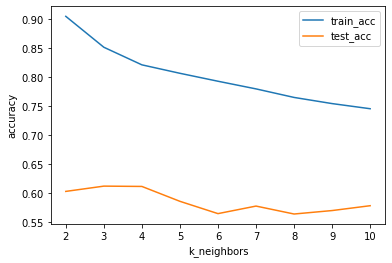

In [53]:
plt.plot(k_neighbors, train_acc_lst, label = 'train_acc')
plt.plot(k_neighbors, test_acc_lst, label = 'test_acc')
plt.legend()
plt.xlabel("k_neighbors")
plt.ylabel("accuracy")
plt.show()

In [56]:
print(knn_reg.score(X_train, Y_train))

0.7452271845214564


### 3. DECISION TREE REGRESSOR MODEL

In [60]:
model1 = DecisionTreeRegressor()
print(model1.fit(X_train, Y_train))

predictions = model1.predict(X_test)
print(predictions)

DecisionTreeRegressor()
[ 80000.          23800.          41000.          98000.
  45000.          55000.          47000.          50000.
 126666.66666667  52250.          38800.          44999.
  52250.          43500.          47999.5         58000.
  32500.          43000.          41000.         130500.
  61000.          52250.          77000.          60000.
  85000.          52000.          88000.          55000.
  55000.         100000.          55000.         120000.
  44000.          45000.          55000.          40000.
  88000.          88000.         120000.          45000.
  55000.         100000.          65000.         130500.
  88000.          41000.          67000.          45000.
 130500.          88000.          26000.          36000.
  42000.          36000.         130500.          52250.
  21000.          36000.          36000.          38000.
  29000.          19000.          47999.         130500.
  56000.         121728.          43500.          99999.
  33000

In [61]:
print(model1.score(X_test, Y_test))

0.14809534584430672


In [62]:
score1 = cross_val_score(model1, X_test, Y_test, cv = 10)
score1

array([ 0.6252524 , -0.2823313 ,  0.44183339, -0.40565764,  0.86752757,
        0.85479819,  0.03345747, -1.8370148 ,  0.3505396 ,  0.24550676])

In [63]:
score1.max()

0.8675275729450327

In [65]:
model2 = DecisionTreeRegressor(max_depth = 4)
print(model2.fit(X_train, Y_train))

print(model2.score(X_test, Y_test))

DecisionTreeRegressor(max_depth=4)
0.499053610101856


In [66]:
score2 = cross_val_score(model2, X_test, Y_test, cv = 10)
score2

array([ 0.71433497,  0.14196715,  0.09615806, -0.45474902,  0.89153512,
        0.92791024,  0.22609891, -1.49929188,  0.43848743,  0.10794963])

#### Maximum score after Cross-Validation & Parameter Tuning

In [67]:
score2.max()

0.9279102408950317

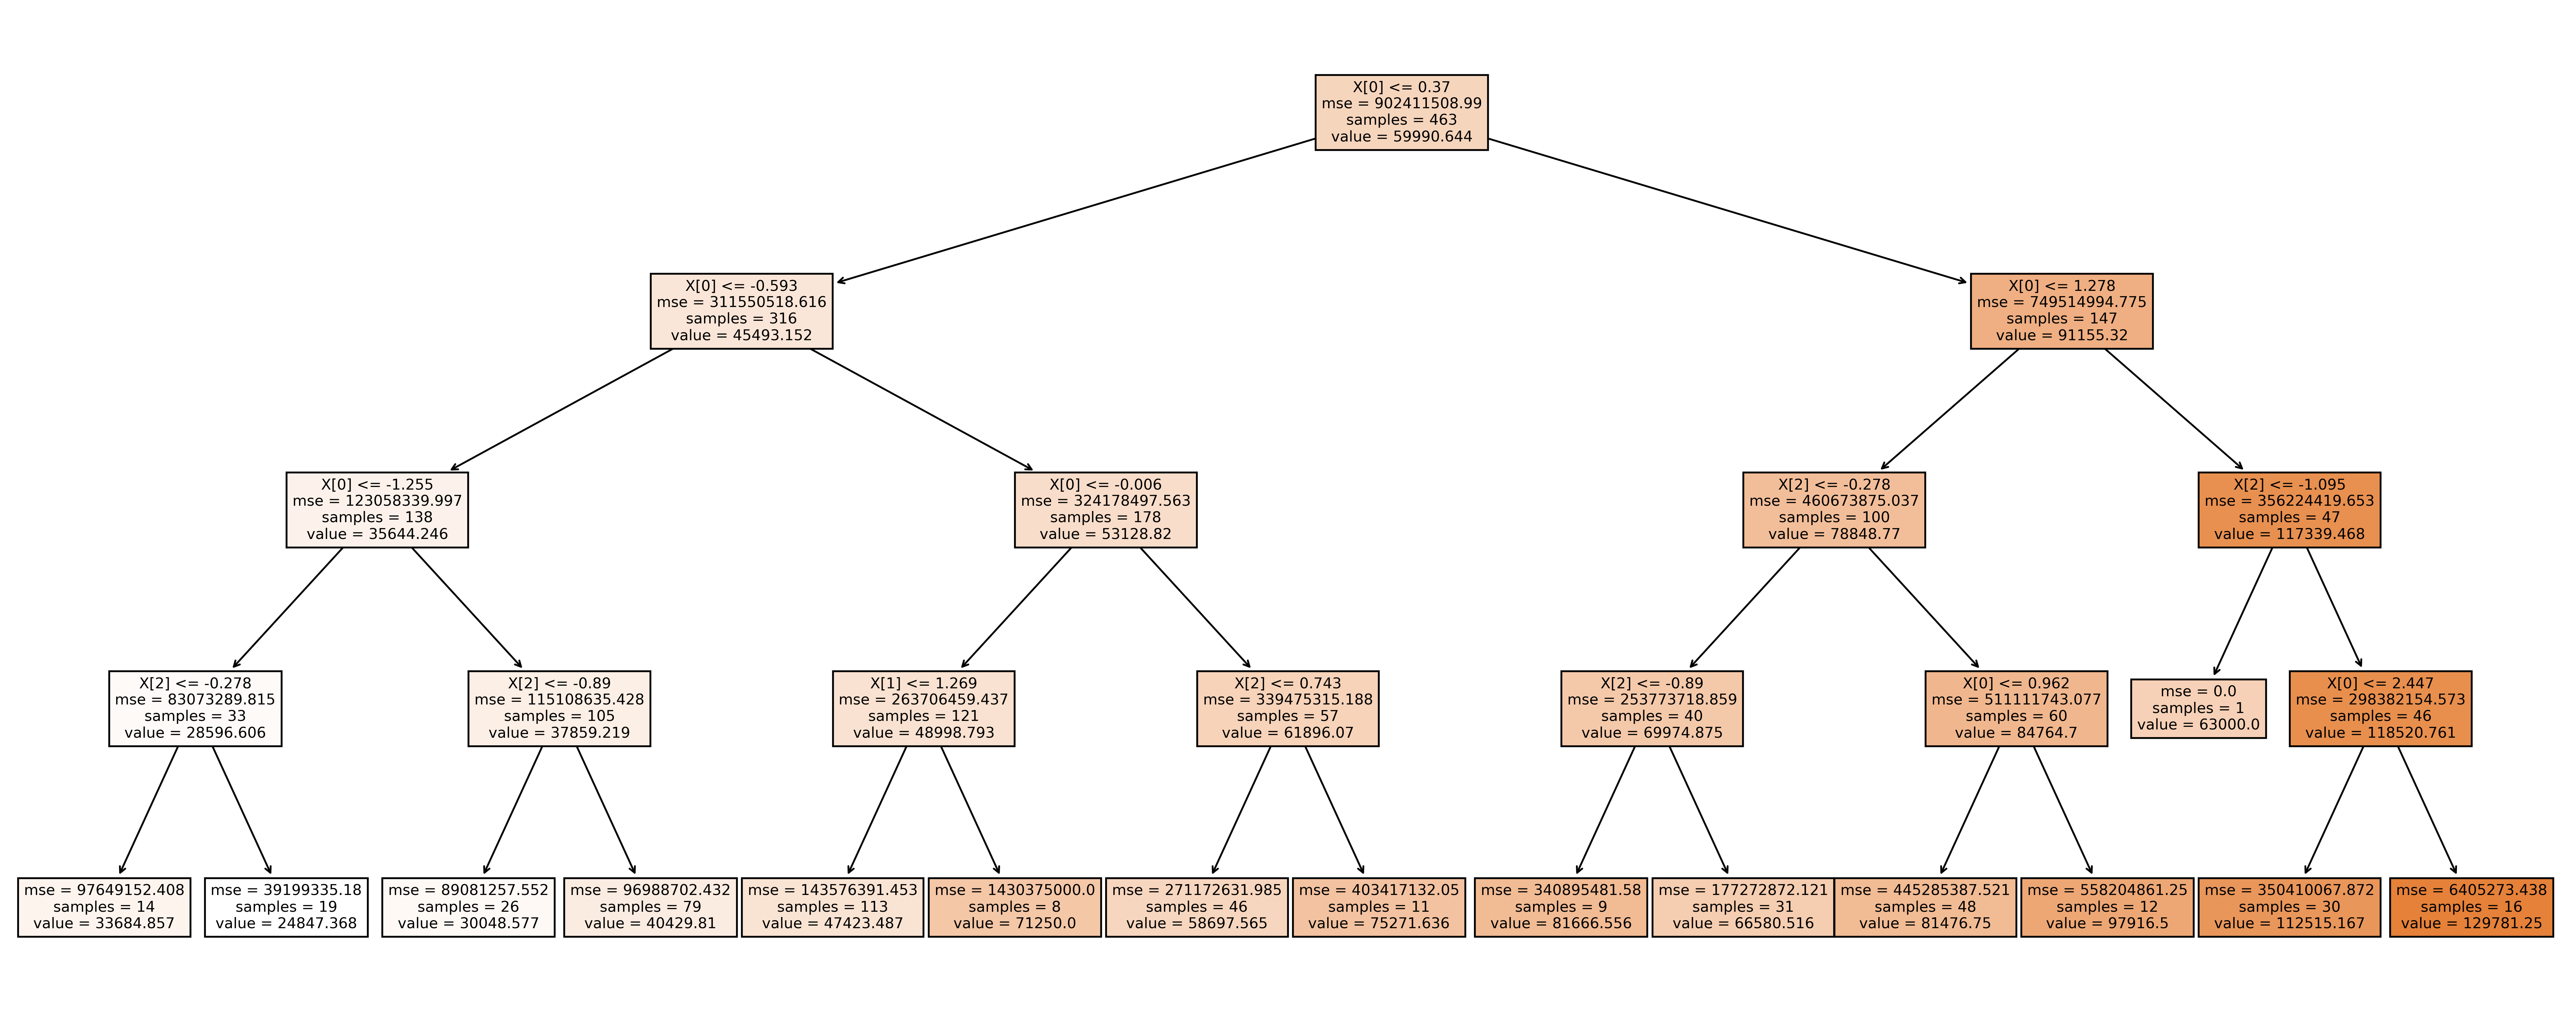

In [71]:
fig, ax = plt.subplots(figsize = (25,10), dpi = 400)
tree = plot_tree(model2, filled = True, ax = ax)